# 3. 그래프와 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(6, 3))

In [2]:
import warnings
warnings.filterwarnings("ignore")

## pandas로 그래프 그리기

- Pandas의 Series와 Dataframe 객체 모두 `plot()` 메서드를 지원
-  `matplotlib.pyplot.plot()`을 이용하기에 `xticks`, `xlim` 등 옵션 사용방식 또한 거의 동일하게 사용 가능

- [pandas.Seris.plot()](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html)
- [pandas.DataFrame.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### 시리즈와 선그래프

- 시리즈는 하나의 선그래프를 그릴 수 있다. 
- 인덱스 : x축 좌표
- value : y축 좌표

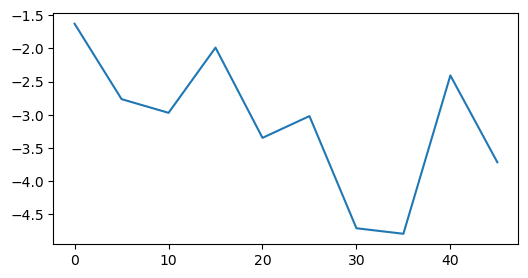

In [4]:
# index 와 dataset 지정 -> plot 사용 -> 그림 출력 (pyplot 과 동일)
pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,50,5)).plot()
plt.show()

### 데이터프레임과 선그래프

- 데이터프레임은 특성 수만큼의 선그래프를 그릴 수 있다.
- y축 좌표는 특성별 value이며, x축 좌표는 기본적으로 index가 사용
- 특성 이름이 범례로 지정

In [5]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.724586,0.484689,-0.581424,-0.773799
10,0.726608,-0.193943,-0.876321,0.266212
20,0.399261,0.799616,-1.082923,0.846353
30,0.866862,1.697263,-0.839991,0.184662
40,1.626084,2.333241,-0.425130,0.122180
50,0.990773,2.455185,-0.187142,-0.910666
60,1.145706,4.135998,-0.236659,-2.432175
70,-0.099677,3.431927,-0.391951,-1.375903
80,-0.744372,3.907448,-1.384224,-1.700908
90,-0.392903,3.318272,-2.363596,-2.295269


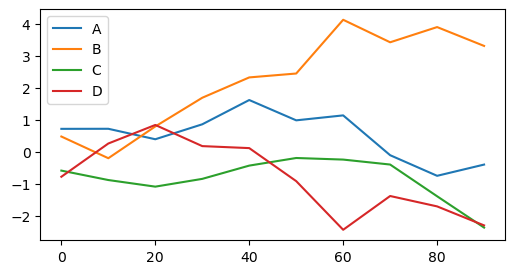

In [7]:
df.plot()
plt.show()

`subplots=True` 
- 각각의 그래프를 1차원 어레이 모양의 독립된 서브플롯에서 그린다.

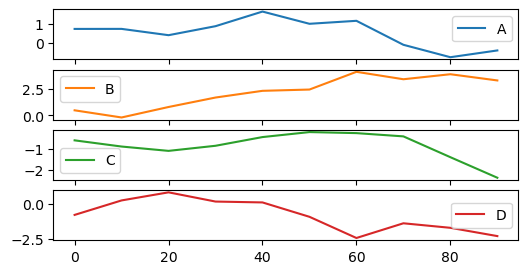

In [17]:
df.plot(subplots=True)
plt.legend(loc="right")
plt.show()

### 시리즈와 막대그래프

- 수직 막대그래프: `pandas.Series.plot.bar()`
- 수평 막대그래프: `pandas.Series.plot.barh()`

- 수평 막대그래프의 x축/y축 눈금은 수직 막대그래프의 y축/x축 눈금에 mapping 된다. 

In [11]:
np.random.seed(12345)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

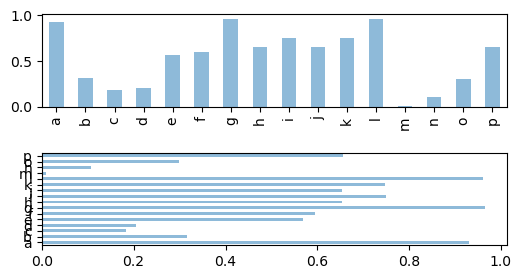

In [15]:
fig, axis = plt.subplots(2,1)
data.plot.bar(ax=axis[0], alpha=0.5)
data.plot.barh(ax=axis[1], alpha=0.5)
plt.subplots_adjust(hspace=0.5)

- 서브플롯을 지정
    - `ax=서브플롯` 옵션을 지정
    - 시리즈와 데이터프레임의 모든 그래프 함수에 사용할 수 있다. 

#### plot() 
- `kind=bar`/`kind=barh` 옵션이 각각 수직/수평 막대그래프를 그리는 함수

### 데이터프레임과 막대그래프

- 수직 막대그래프: `pandas.DataFrame.plot.bar()`
- 수평 막대그래프: `pandas.DataFrame.plot.barh()`

수평 막대그래프의 x축/y축 눈금은 수직 막대그래프의 y축/x축 눈금에 해당한다.

- 범례 제목: 컬럼 인덱스의 이름이 주어진 경우 사용된다.
- 행별 막대그래프를 하나로 묶어서 보여준다.

In [18]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

In [19]:
np.random.rand(6,4)

array([[0.80981255, 0.87217591, 0.9646476 , 0.72368535],
       [0.64247533, 0.71745362, 0.46759901, 0.32558468],
       [0.43964461, 0.72968908, 0.99401459, 0.67687371],
       [0.79082252, 0.17091426, 0.02684928, 0.80037024],
       [0.90372254, 0.02467621, 0.49174732, 0.52625517],
       [0.59636601, 0.05195755, 0.89508953, 0.72826618]])

In [20]:
# index 와 columns 을 지정해주자. 
df= pd.DataFrame(np.random.rand(6,4),
                 index=["one", "two", "three", "four", "five", "six"],
                 columns=pd.Index(["A","B","C","D"]))

<Axes: >

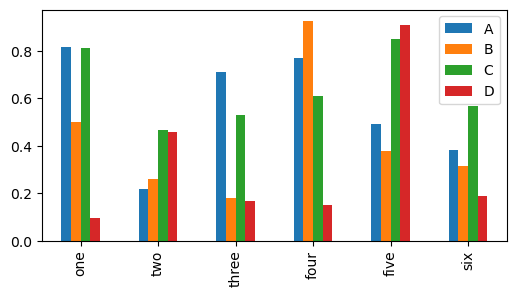

In [21]:
df.plot.bar()

<Axes: >

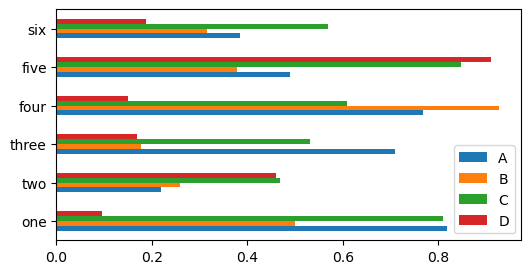

In [22]:
df.plot.barh()

#### 누적막대그래프

`stacked=True` 옵션을 사용하면 각 행의 값들이 하나의 막대에 누적 출력

<Axes: >

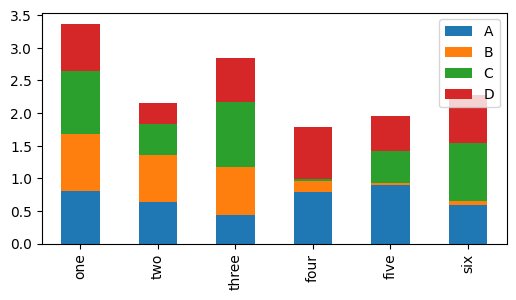

In [18]:
df.plot.bar(stacked=True)

<Axes: >

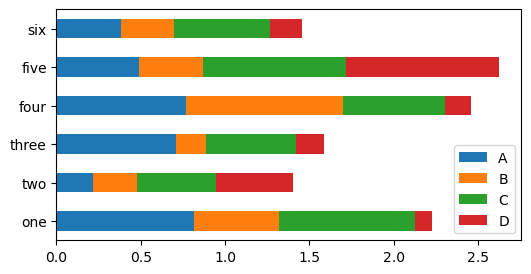

In [23]:
df.plot.barh(stacked=True)

#### plot() 메서드의 `kind=bar`와 `kind=barh` 옵션

`kind=bar`/`kind=barh` 옵션이 각각 수직/수평 막대그래프를 그리는 함수와 동일

<Axes: >

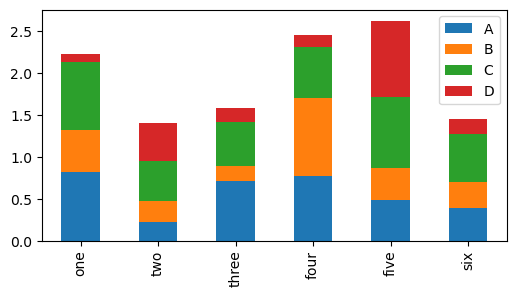

In [24]:
df.plot(kind="bar", stacked=True)

In [22]:
# https://matplotlib.org/3.5.3/gallery/index.html
# https://matplotlib.org/3.5.3/tutorials/index.html

### 예제: 서비스 팁(tip) 데이터

서비스 팁 데이터는 요일별 파티 수, 총 수입, 시간대, 팁 수입 등에 대한 정보를 담고 있다.

__참고:__ 서비스 팁 데이터를 아래처럼 불러올 수도 있다.

```python
import seaborn as sns
tips = sns.load_dataset('tips').drop('sex', axis=1)
```

In [25]:
tips_path = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/tips.csv'

In [26]:
tips = pd.read_csv(tips_path)
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


column별 특성

- `total_bill`: 총 수입
- `tip`: 서비스 팁
- `smoker`: 흡연 여부 
- `day`: 요일
- `time`: 시간대(점심/저녁)
- `size`: 파티 규모(참여인원 수)

In [27]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


범주형 데이터에 사용된 값들은 다음과 같다.

- 흡연 여부

In [28]:
tips.smoker.unique()# set 과 동일 

array(['No', 'Yes'], dtype=object)

* 요일

In [29]:
tips.day.unique() #영업일 

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

* 시간대

In [30]:
tips.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

- size 
    - 해당 파티 규모(참여인원 수)
    - 최소 1명 최대 6명이 참여


In [31]:
tips["size"].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

#### cross table
- 요일과 파티 규모 사이의 관계를 파악하기 위해 교차표(cross table)를 이용
- `pandas.crosstab()` 함수는 지정된 두 특성 사이의 도수분포도를 표로 생성
- [참고](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=niiceha3&logNo=220718992859)

In [33]:
party_counts = pd.crosstab(tips["day"], tips["size"])

In [36]:
party_counts = party_counts.reindex(['Thur', "Fri", "Sat", "Sun"])
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


- 빈도수가 낮은 1인과 6인 파티는 제외하자.
- 왜? 이상치가 전체 데이터의 상위1% 하위 1% 안에 존재한다면 제외 

In [37]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


<Axes: xlabel='day'>

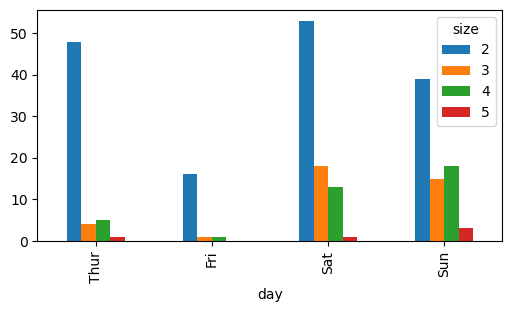

In [38]:
# 금요알은 참여 인원이 적다. 
party_counts.plot.bar()

#### 행별 정규화(Normalization)

- column별 항목의 합이 1이 되도록 값을 정규화한다.
    - 요일별 파티 규모의 비율을 파악할 수 있다.
    - 가장 파티를 많이 하는 요일을 찾을수 있다. 

- `pandas.div()` 함수: 각 항목을 지정된 값으로 나눈다. `axis=0`는 행별로 나눗셈을 실행하도록 지정한다.

In [53]:
party_counts.sum(1)

day
Thur    58
Fri     18
Sat     85
Sun     75
dtype: int64

In [39]:
# 각 요일별로 합이 1이다. 
party_pct = party_counts.div(party_counts.sum(1), axis=0)
party_pct

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


- 주말일 수록 파티 규모가 커짐을 알수 있다. 

<Axes: xlabel='day'>

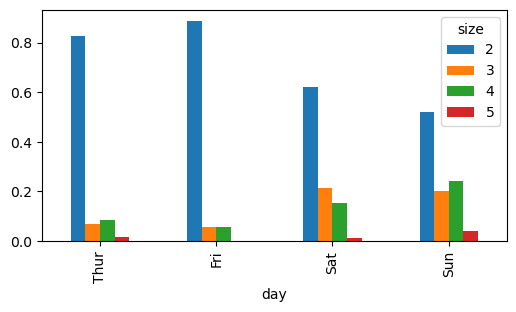

In [40]:
party_pct.plot.bar()

## seaborn으로 그래프 그리기

In [42]:
!pip install seaborn

- seaborn 라이브러리는 matplotlib을 바탕으로 멋진 통계 관련 그래프를 그리는 API(도구)를 제공

In [43]:
import seaborn as sns

- 'tip_pct' column에 요일별로 총 순수수입에서 서비스 팁이 차지하는 비율을 추가하자
    - 팁 비율: 총 순수수입 $=$ 총 수입 $-$ 팁

In [44]:
tips["tip_pct"] = tips["tip"]/(tips["total_bill"]-tips["tip"])

In [45]:
# tips["tip_pct"] = tips["tip"]/(tips["total_bill"])

In [47]:
tips["tip_pct"]

0      0.063204
1      0.191244
2      0.199886
3      0.162494
4      0.172069
         ...   
239    0.256166
240    0.079428
241    0.096759
242    0.108899
243    0.190114
Name: tip_pct, Length: 244, dtype: float64

#### `seaborn.barplot()` 함수

In [54]:
tips[tips.day == "Sun"].tip_pct.mean()

0.22571784420673371

<Axes: xlabel='tip_pct', ylabel='day'>

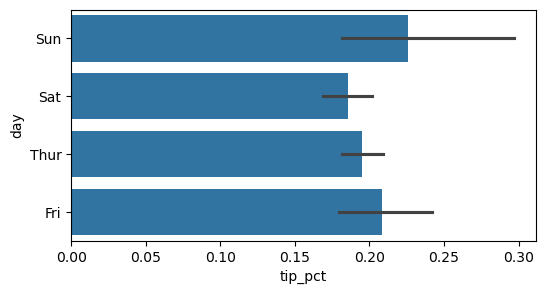

In [48]:
sns.barplot(tips, x="tip_pct", y="day")

- 요일별 서비스 팁의 비율의 평균값(mean)
    - 막대 끝에 위치한 검정 직선 기본적으로 신뢰도 95%의 신뢰구간을 표시하는 __오차 막대__(error bar)이다.
    - 95%의 신뢰도 다음 범주에 데이터가 존재 한다
    - 샘플 데이터(현재 데이터)에서 계산한 평균으로, 해당 평균이 95%의 확률로 포함되는 범위를 나타낸다. 
    - 일요일은 그래프에서 가장 긴 막대를 가지며, 이는 일요일의 서비스 팁 비율이 다른 날들에 비해 높다는 것을 알수 있다
    - 일요일의 평균 팁은 0.225717 이고 이를 기준으로 일요일의 평균팁의 비율은 95%의 확률로 신뢰구간 안에 들어갈 수 있다. 
    - 오차 막대의 길이에 따라 평균값의 정확성과 불확실성을 해석할 수 있습니다. 오차 막대의 길이가 길수록 평균 추정이 불확실 하다.
- 신뢰구간의 크기에 영향을 주는 요인
    - 표본의 크기가 크면 신뢰구간은 좁아진다.
    - 표준 편차의 크기가 클수록 넓어진다.
    - 신뢰 수준이 높아질수록 넓어진다.  

- `ci` 옵션을 조절하면 신뢰구간을 다음과 같이 변경 가능
    - `ci='sd'` 옵션: 신뢰 구간 대신에 표준 편차(standard deviation) 표시.
    - `ci=None` 옵션: 검정 막대 표시하지 않음.

<Axes: xlabel='tip_pct', ylabel='day'>

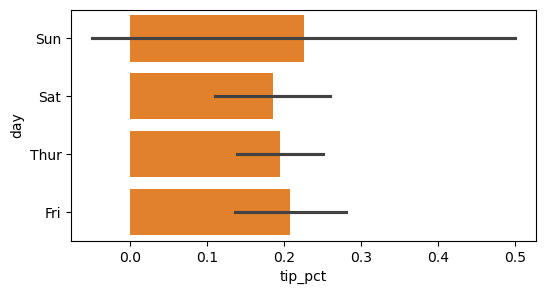

In [55]:
sns.barplot(tips, x="tip_pct", y="day", ci="sd")
sns.barplot(tips, x="tip_pct", y="day", ci=None)

* `hue='time'`: time column을 추가 기준으로 사용하면 다음 결과가 보인다.

<Axes: xlabel='tip_pct', ylabel='day'>

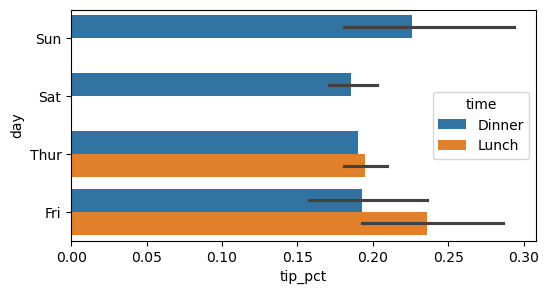

In [56]:
# time : dinner 와 lunch 를 기준으로 분리 
sns.barplot(data = tips, x="tip_pct", y="day", hue="time")

__참고:__ 목요일 저녁 막대에 신뢰구간이 표시되지 않는 이유는 단 한 번의 파티만 있었기 때문

In [57]:
tips[tips["day"] == "Thur"][tips["time"]=="Dinner"]

,total_bill,tip,smoker,day,time,size,tip_pct
243,18.78,3.0,No,Thur,Dinner,2,0.190114


In [73]:
# 참고 https://www.kaggle.com/code/kanncaa1/plotly-tutorial-for-beginners/notebook
# 참고 https://www.kaggle.com/search?q=seaborn+tutorial

### seaborn 기본 설정

`seaborn.set_theme()` 함수를 이용하여 다양한 설정을 지정가능

```python
seaborn.set_theme(context='notebook', 
                  style='darkgrid', 
                  palette='deep', 
                  font='sans-serif', 
                  font_scale=1, 
                  color_codes=True, 
                  rc=None)
```

In [59]:
sns.set_theme?

Signature:
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)
Docstring:
Set aspects of the visual theme for all matplotlib and seaborn plots.

This function changes the global defaults for all plots using the
matplotlib rcParams system. The themeing is decomposed into several distinct
sets of parameter values.

The options are illustrated in the :doc:`aesthetics <../tutorial/aesthetics>`
and :doc:`color palette <../tutorial/color_palettes>` tutorials.

Parameters
----------
context : string or dict
    Scaling parameters, see :func:`plotting_context`.
style : string or dict
    Axes style parameters, see :func:`axes_style`.
palette : string or sequence
    Color palette, see :func:`color_palette`.
font : string
    Font family, see matplotlib font manager.
font_scale : float, optional
    Separate scaling factor to independently scale the size of the
    font elements.
color_cod

In [60]:
sns.set_theme(style="darkgrid")
# style의 종류는?

지정된 설정은 모든 그래프에 영향을 준다.

<Axes: xlabel='tip_pct', ylabel='day'>

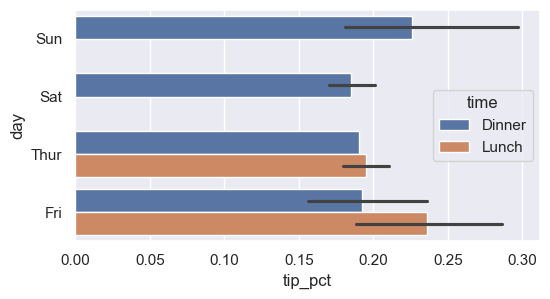

In [61]:
sns.barplot(data=tips, x="tip_pct", y="day", hue="time")

### 히스토그램과 밀도그래프

- 아래 pandas의 `plot()` 함수를 이용하여 히스토그램을 그리는 것을 보여준다.
- 사용되는 date는 요일별 팁의 비율이다. (최고 2.5% )

<Axes: ylabel='Frequency'>

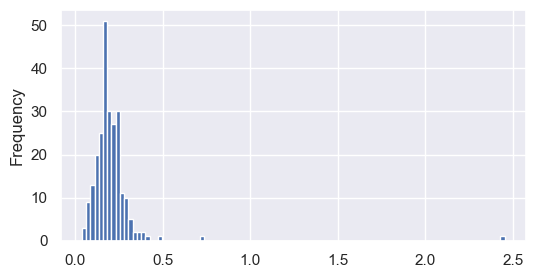

In [62]:
tips["tip_pct"].plot.hist(bins=100)

- `pandas.plot.density()` 함수는 히스토그램에 대한 추정 연속확률밀도 함수의 그래프를 그린다.

In [63]:
# !pip install scipy # 설치 안해도 될것같긴한데 아마 오류메세지 발생가능...

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.4/46.2 MB 25.3 MB/s eta 0:00:02
   - -------------------------------------- 1.3/46.2 MB 14.3 MB/s eta 0:00:04
   - -------------------------------------- 2.2/46.2 MB 15.9 MB/s eta 0:00:03
   -- ------------------------------------- 3.2/46.2 MB 15.5 MB/s eta 0:00:03
   --- ------------------------------------ 3.7/46.2 MB 14.7 MB/s eta 0:00:03
   --- ------------------------------------ 4.4/46.2 MB 14.1 MB/s eta 0:00:03
   ---- ----------------------------------- 5.3/46.2 MB 13.5 MB/s eta 0:00:04
   ----- ---------------------------------- 5.8/46.2 MB 13.3 MB/s eta 0:00:04
   ----- ---------------------------------- 6.3/46.2 MB 13.9 MB/s eta 0:00:03
   ----- ---------------------------------- 6.3/46.2 MB 13.9 MB/s eta 0:00:0

<Axes: ylabel='Density'>

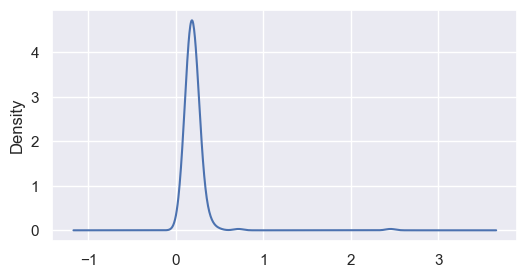

In [79]:
tips["tip_pct"].plot.density()

- seaborn 라이브러리를 이용하여 히스토그램과 밀도그래프를 함께 그릴 수도 있다.
    - `seaborn.histplot()` 또는 `seaborn.displot()` 함수를 `kde=True` (커널 밀도 추정) 옵션과 함께 사용가능

#### `seaborn.histplot()` 함수

<Axes: ylabel='Count'>

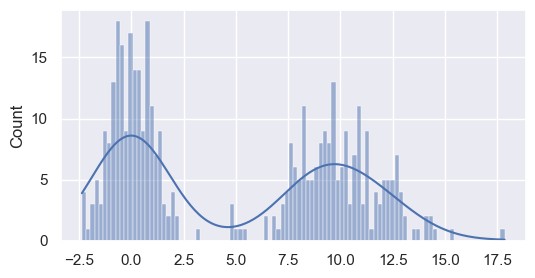

In [80]:
np.random.seed(12345)

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(data= values, bins=100, kde=True)

<Axes: ylabel='Count'>

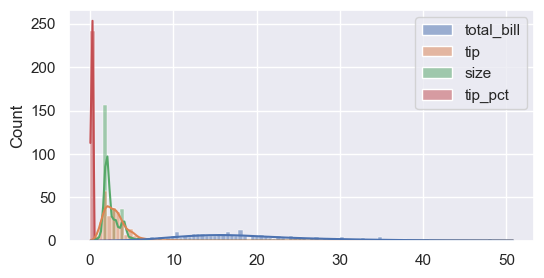

In [81]:
sns.histplot(data= tips, bins=100, kde=True)

<Axes: xlabel='tip_pct', ylabel='Count'>

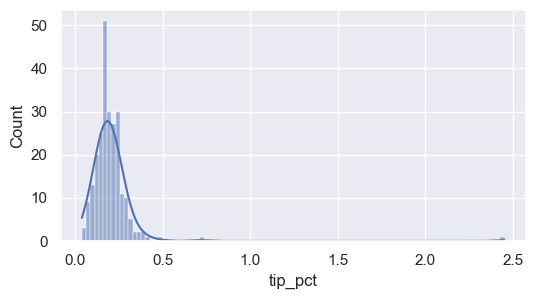

In [82]:
# tips["tip_pct"].plot.hist(bins=100, kde=True)
sns.histplot(data=tips["tip_pct"], bins=100, kde=True)

#### `seaborn.displot()` 함수 (확인필요)

`seaborn.displot()` 사용할 경우 사이즈와 가로세로의 기본 비율이 다르다.

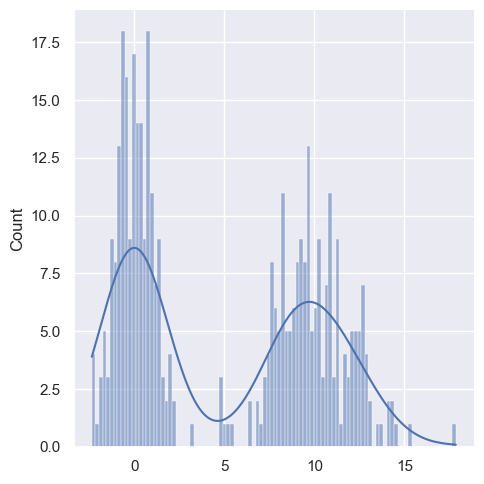

In [83]:
sns.displot(values, bins=100, kde=True)

하지만 `height`와 `aspect` 옵션을 이용하면 적절한 크기와 비율로 맞출 수 있다.

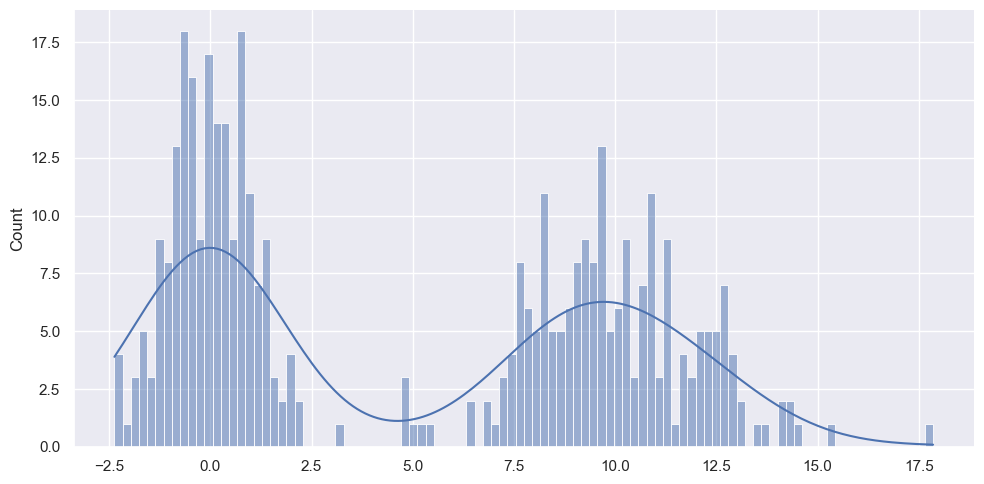

In [47]:
sns.displot(values, bins=100, kde=True, height=5, aspect=2)

#### 예제: 서비스 팁 비율의 히스토그램과 밀도 그래프

In [84]:
data = tips['tip_pct']

<Axes: xlabel='tip_pct', ylabel='Count'>

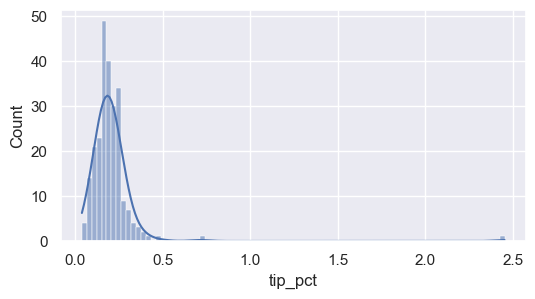

In [85]:
sns.histplot(data=data, kde=True)

### 산점도
- `statsmodels` 모듈에서 불러온다.

- 1959년부터 2009년까지 미국의 거시경제지표 데이터 사용

In [64]:
# 거시경제 지표 데이터 설치하기
!pip install statsmodels 

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB 10.2 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/9.9 MB 12.6 MB/s eta 0:00:01
   ------- -------------------------------- 1.8/9.9 MB 12.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.9 MB 12.4 MB/s eta 0:00:01
   ----------- ---------------------------- 2.9/9.9 MB 12.2 MB/s eta 0:00:01
   ------------ --------------------------- 3.0/9.9 MB 10.0 MB/s eta 0:00:01
   ---------------- ----------------------- 4.0/9.9 MB 11.0 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.9 MB 10.8 MB/s eta 0:00:01
   ----------------- ---------------------- 4.3/9.9 MB 10.3 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.9 MB 9.8 MB/s eta 0:00:01
   ----------------------- ---------------- 5.7/9.9 MB 9.9 MB/s eta 0:00:01
   ------------------------- -------------- 6.2/9.9 MB 9.9 MB/s eta 0:00:01
   -------

In [65]:
import statsmodels.api as sm

macro = sm.datasets.macrodata.load_pandas().data
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


포함된 14개의 경제지표는 다음과 같다.

| 지표 | 설명 |
| :--- | :--- |
| year | 1959년 1분기 - 2009년 3분기 |
| quarter | 1 - 4분기|
| realgdp | 실질 국내총생산 (단위: 억 달러) |
| realcons | 실질 총민간 소비지출 (단위: 억 달러) |
| realinv | 실질 총민간 국내투자 (단위: 억 달러) |
| realgovt | 실질 연방 정부 소비지출 및 국내투자 (단위: 억 달러) |
| realdpi | 실질 가처분 소득 (단위: 억 달러) |
| cpi | 소비자 물가지수 |
| m1 | M1 통화지표 | 
| tbilrate | 3개월 만기 국채 수익률|
| unemp | 실업률 | 
| pop | 인구 |
| infl | 물가상승률 |
| realint | 실질 이자율 |

이중에 네 개의 지표만 이용해서 산점도를 설명한다.

- cpi: 분기별 소비자 물가지수
- m1: M1 통화지수
- tbilrate: 3개월 만기 국채 수익률
- unemp: 실업률

In [91]:
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


시간의 흐름에 따른 변화량
- 사용된 데이터의 척도(scale)을 맞추기 위해 로그값을 취한 후 분기별 변화량을 측정
- `np.log()` 함수: 어레이/데이터프레임의 항목별로 적용되는 유니버설 함수
- `diff()` 메서드: 열별로 이전 행의 항목값과의 차이를 계산함. 
    0번 행이거나 결측치가 사용되었을 경우 결측치로 처리됨.
    `axis=1`로 지정하면 열별 차이를 계산함.
- `dropna()` 메서드: 결측치가 포함된 행 삭제.
    `axis=1`로 지정하면 결측치가 포함된 열 삭제.
    


In [93]:
trans_data = np.log(data).diff()
trans_data = trans_data.dropna()

#### 산점도와 선형회귀 곡선
- `seaborn.regplot()` 함수는 산점도와 두 데이터 사이의 선형 관계를 보여주는 선형회귀 곡선을 동시에 그린다.

```python
seaborn.regplot(x='m1', y='unemp', data=trans_data)
```

<Axes: xlabel='m1', ylabel='unemp'>

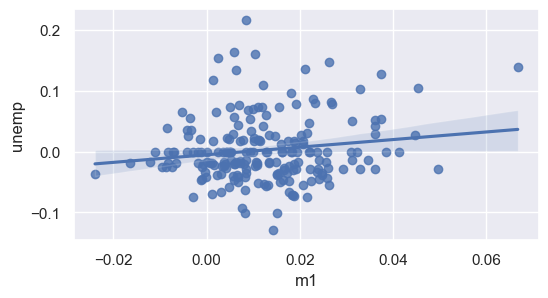

In [94]:
sns.regplot(x = "m1", y = "unemp", data = trans_data)

- `m1` 데이터와 `unemp` 데이터 사이의 선형관계가 많이 있어보이지는 않는다. 
- 실제로 두 특성 사이의 상관계수르 확인해 보자

In [95]:
data_corr = trans_data.corr()
data_corr

,cpi,m1,tbilrate,unemp
cpi,1.000000,-0.050535,0.329456,0.019750
m1,-0.050535,1.000000,-0.360278,0.150729
tbilrate,0.329456,-0.360278,1.000000,-0.371491
unemp,0.019750,0.150729,-0.371491,1.000000


`seaborn.heatmap()` 함수를 이용하여 선형관계를 색으로 표현가능

<Axes: >

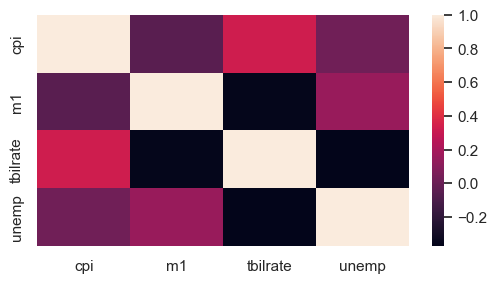

In [56]:
sns.heatmap(data_corr)

<Axes: xlabel='cpi', ylabel='tbilrate'>

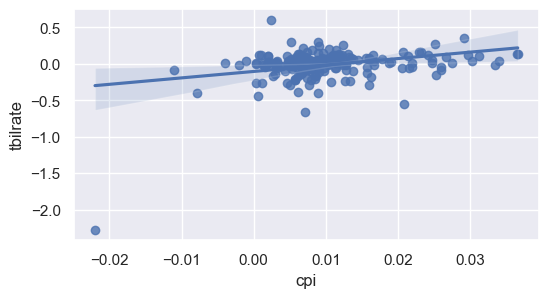

In [96]:
# CIP 와 3개월 국채 수익률을 산점도로 그려보세요
sns.regplot(x="cpi", y="tbilrate", data =trans_data)

__참고:__ 선형회귀 직선을 보이지 않으려면 `fit_reg=False` 옵션을 사용한다.

- 소비자 가격 지수(CPI)란: 
  - 일반 상품 및 서비스의 가격 변동을 측정한다.
  - 인플레이션 또는 디플레이션의 척도로 사용된다.

- 3개월 국채 수익률이란:
  - 단기 국채의 수익률을 나타낸다.
  - 안전한 투자 수단으로 간주되며, 중앙 은행의 금리 정책에 영향을 받는다.

- CPI와 3개월 국채 수익률 사이의 관계:
  - 인플레이션 예상: CPI 상승은 상품 및 서비스 가격 상승을 의미하며, 이는 인플레이션률 상승으로 이어진다. 이에 따라 투자자들은 높은 이자율을 요구할 수 있다.
  - 중앙 은행의 통화 정책: 인플레이션률 상승 시, 중앙 은행은 금리를 올려 인플레이션을 제어하려 한다. 이는 국채 수익률 상승으로 이어질 수 있다.
  - CPI 상승은 인플레이션 증가와 금리 상승을 예상하는 시장 반응을 보여주며, 이는 국채 수익률 상승으로 연결될 수 있다.
  - 이러한 관계는 여러 변수에 의해 영향을 받으므로, 항상 일관적으로 적용되지 않는다. 경제 상황, 통화 정책, 기타 매크로 경제적 요인을 고려해야 한다.

`seaborn.regplot()` 
- [참고](https://seaborn.pydata.org/generated/seaborn.regplot.html)

#### 산점도 행렬

In [97]:
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


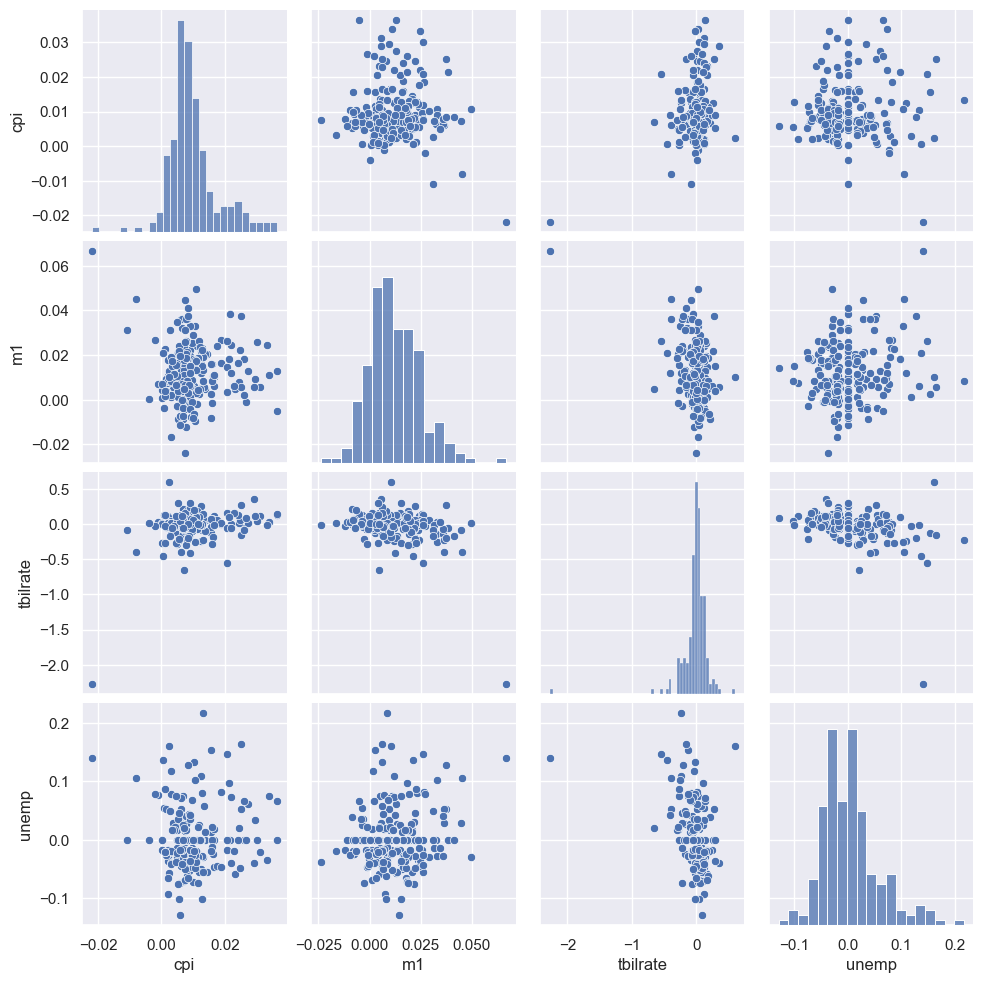

In [98]:
sns.pairplot(trans_data)

`diag_kind=kde` 옵션을 사용하면 대각선 상에 히스토그램 대신 밀도그래프가 삽입된다.

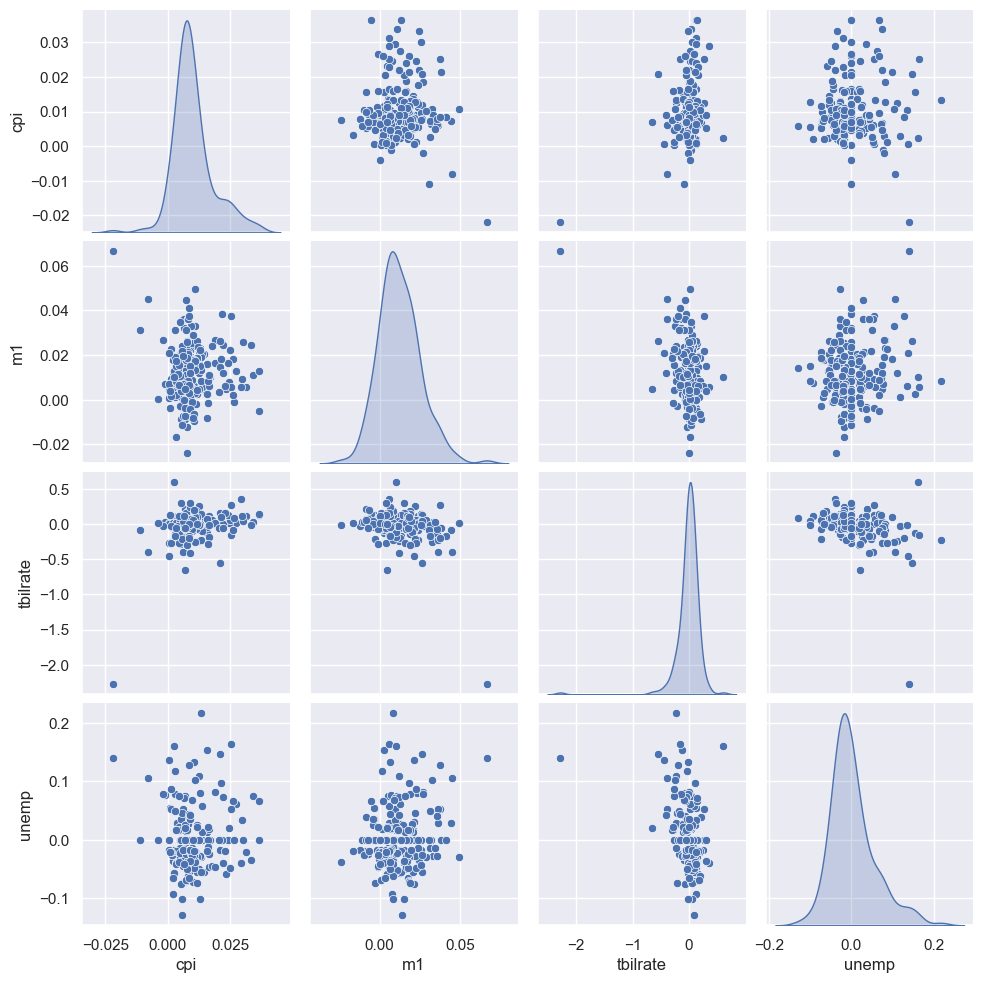

In [99]:
sns.pairplot(trans_data, diag_kind="kde")